In [34]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
df = pd.read_csv("data_v6.csv")
startdates = pd.to_datetime(df["StartDate"], format='%Y-%m-%d')
#df = df.dropna()
df

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,NumEmployees,...,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds,DirectorAddressLatitude,DirectorAddressLongitude,BusinessAddressLatitude,BusinessAddressLongitude,StartYear,StartDecade,IndustryShortCode,IndustryGroup
0,POULSEN & HANSEN A/S,76958211,"C/O Flethøj Ejendomsadministration ApS, Energi...",1985-01-17,NORMAL,682040,Udlejning af erhvervsejendomme,København,101,6,...,3237.0,606.0,55.671052,12.561257,55.657727,12.557978,1985,1980,68,Fast ejendom
1,SWEDISH ORPHAN BIOVITRUM A/S,19179079,Sorgenfrivej 17,1996-02-08,NORMAL,464610,Engroshandel med medicinalvarer og sygeplejear...,Lyngby-Taarbæk,173,11,...,696252.0,35422.0,59.260329,18.194250,55.137627,14.758286,1996,1990,46,Engros og detail.; rep. af motorkøretøjer og -...
2,Oticon Denmark A/S,42338028,Kongebakken 9,1972-05-26,NORMAL,465220,Engroshandel med telekommunikationsudstyr,Egedal,240,61,...,383203.0,18336.0,55.762723,12.549633,57.486851,10.337708,1972,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
3,BADEN-JENSEN A/S,29167613,Baltorpbakken 16,1970-02-19,NORMAL,467320,"Engroshandel med lak, maling, tapet, gulvbelæg...",Ballerup,151,37,...,30477.0,1455.0,55.816496,12.544167,55.731771,12.338362,1970,1970,46,Engros og detail.; rep. af motorkøretøjer og -...
4,REITAN CONVENIENCE DENMARK A/S,15516046,Buddingevej 195,1991-10-01,NORMAL,829900,Anden forretningsservice i.a.n.,Gladsaxe,159,63,...,NaN,NaN,NaN,NaN,55.751531,12.496268,1991,1990,82,Administrative tjenesteydelser og hjælpetjenester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,M A T ApS,26596300,Gersonsvej 7,2002-05-02,NORMAL,464210,Engroshandel med beklædning,Gentofte,157,18,...,4973.0,554.0,55.769713,12.585628,55.733208,12.566897,2002,2000,46,Engros og detail.; rep. af motorkøretøjer og -...
2165,F.A. CONSULTING A/S,27080049,"Herlev Ringvej 2C, 1.",2003-01-02,NORMAL,620200,Konsulentbistand vedrørende informationsteknologi,Herlev,163,2,...,15683.0,1169.0,55.708582,12.597020,55.723171,12.441770,2003,2000,62,Information og kommunikation
2166,A-SAFE ApS,35252932,"Rugvænget 46A, 1.",2013-06-01,NORMAL,467400,"Engroshandel med isenkram, varmeanlæg og tilbehør",Høje Taastrup,169,4,...,1568078.0,64420.0,53.706530,-1.875317,55.649471,12.285993,2013,2010,46,Engros og detail.; rep. af motorkøretøjer og -...
2167,A.A. EL-CENTER A/S,66358119,Krondalvej 7,1980-10-29,NORMAL,432100,El-installation,Rødovre,175,5,...,4805.0,544.0,55.671301,12.405901,55.700383,12.434073,1980,1980,43,Bygge- og anlægsvirksomhed


In [36]:
print(df["NumEmployees"].median())
df[df["NumEmployees"] == df["NumEmployees"].max()]

7.0


,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,NumEmployees,...,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds,DirectorAddressLatitude,DirectorAddressLongitude,BusinessAddressLatitude,BusinessAddressLongitude,StartYear,StartDecade,IndustryShortCode,IndustryGroup
1307,PARKEN Services A/S,38265806,Per Henrik Lings Allé 2,2016-12-14,NORMAL,931100,Drift af sportsanlæg,København,101,867,...,8931.0,1289.0,55.665114,12.624141,55.702299,12.571556,2016,2010,93,"Kultur, forlystelser og sport"


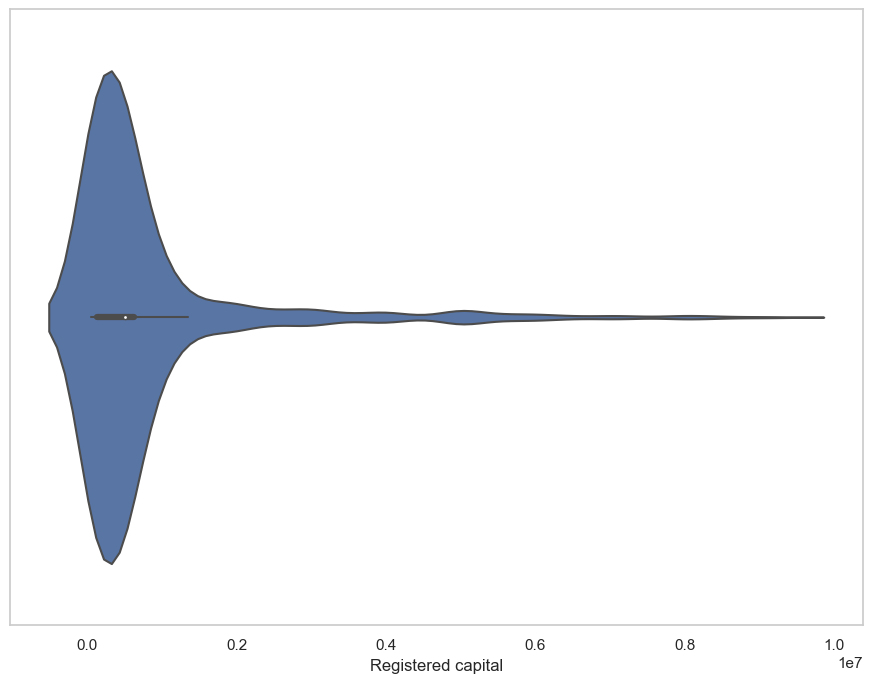

In [37]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax = sns.violinplot(x=df["RegisteredCapital"])
ax.set(xlabel='Registered capital')
ax.grid(False)

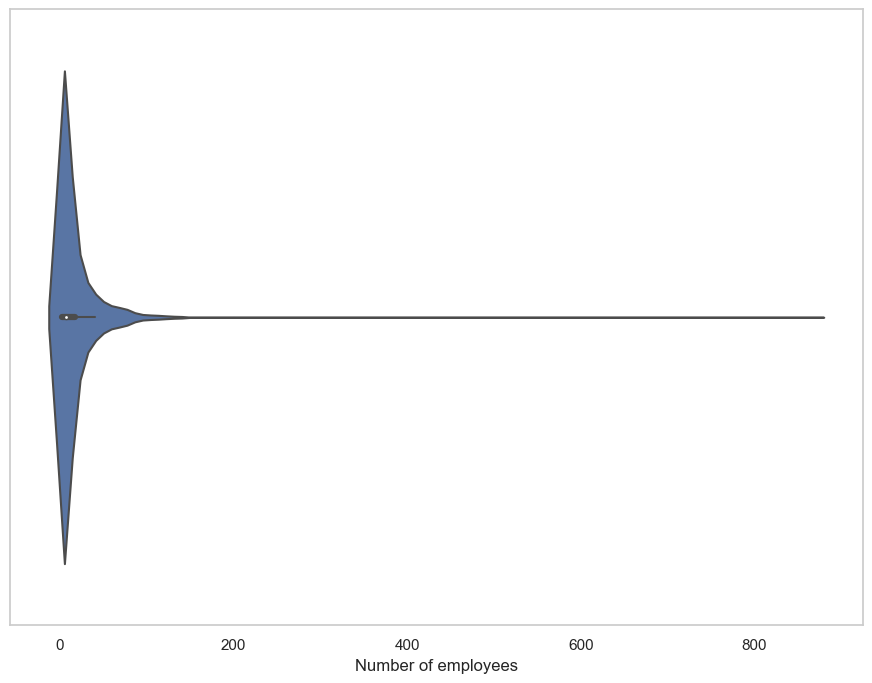

In [38]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax=sns.violinplot(x=df["NumEmployees"])
ax.set(xlabel='Number of employees')
ax.grid(False)

In [39]:
df = df[(df["NumEmployees"] < df["NumEmployees"].quantile(0.95)) & (df["RegisteredCapital"] < df["RegisteredCapital"].quantile(0.95))]
len(df)

1968

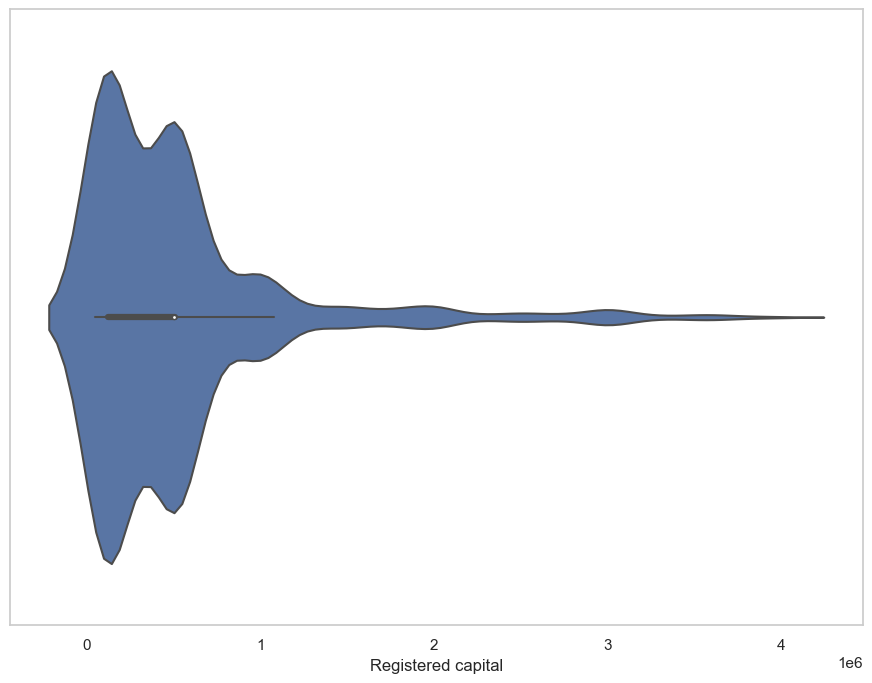

In [40]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax = sns.violinplot(x=df["RegisteredCapital"])
ax.set(xlabel='Registered capital')
ax.grid(False)

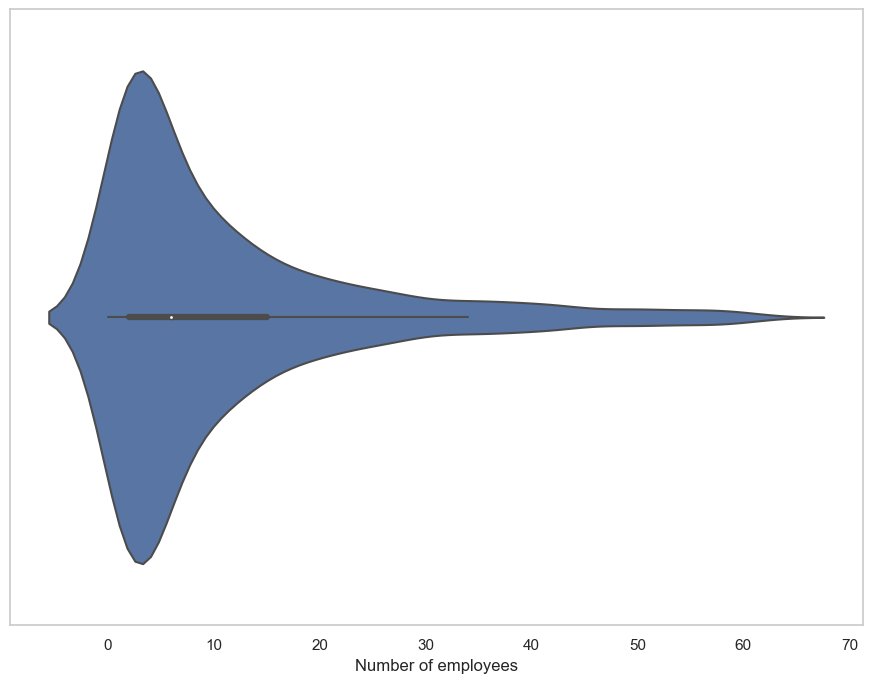

In [41]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
ax=sns.violinplot(x=df["NumEmployees"])
ax.set(xlabel='Number of employees')
ax.grid(False)

In [42]:
df.nlargest(5, "RegisteredCapital")[["Name", "RegisteredCapital"]]

,Name,RegisteredCapital
55,COPENHAGEN INVEST A/S,3974840.0
809,INFINIGATE DANMARK A/S,3900000.0
1046,SCANAVO A/S,3750000.0
1935,STEPSTONE A/S,3700000.0
83,FLSmidth Global Services A/S,3625000.0


In [43]:
df["RegisteredCapital"].median()

500000.0

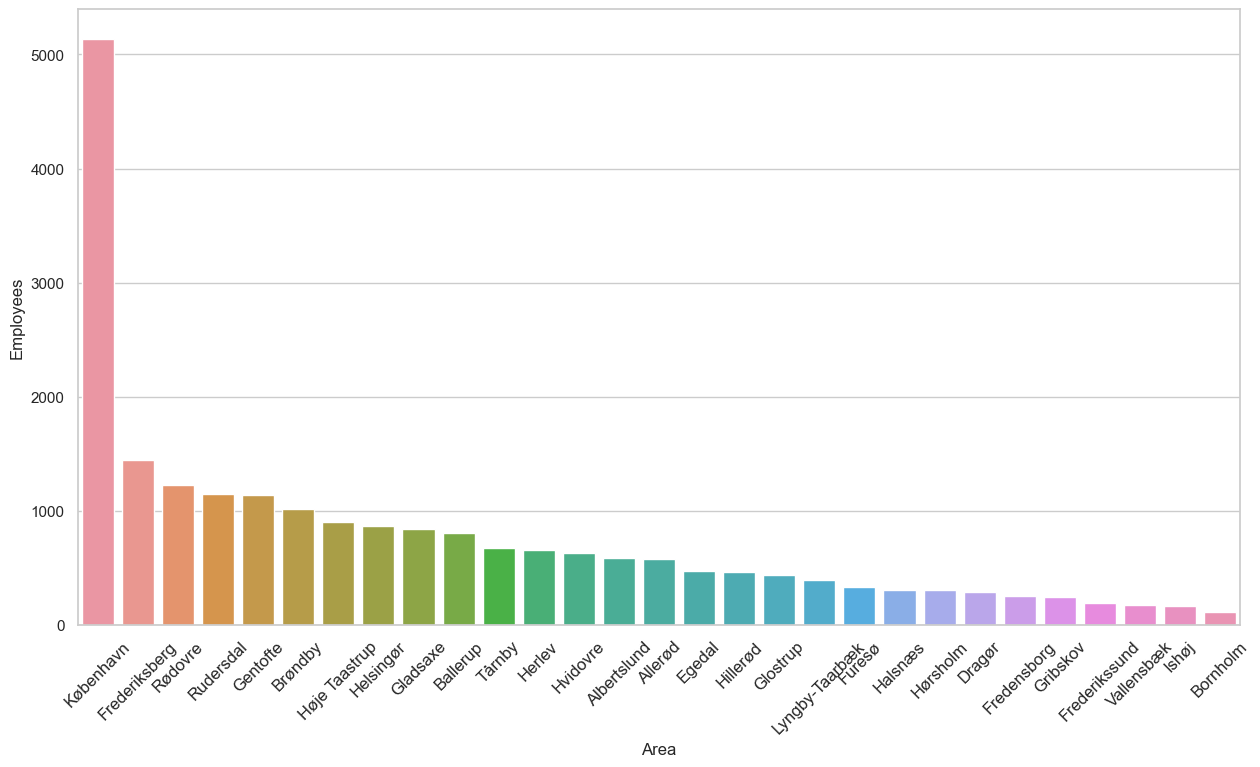

In [44]:
employee_area_df = {
    "Area": [],
    "Employees": []
}

for area in df["Area"].unique():
    employee_area_df["Area"].append(area)
    employee_area_df["Employees"].append(df[df["Area"] == area]["NumEmployees"].sum())
    
plt.figure(figsize=(15,8))
ax=sns.barplot(pd.DataFrame(employee_area_df).sort_values(by=['Employees'], ascending=False), x="Area", y="Employees")
ax.tick_params(axis='x', rotation=45, labelsize=12)

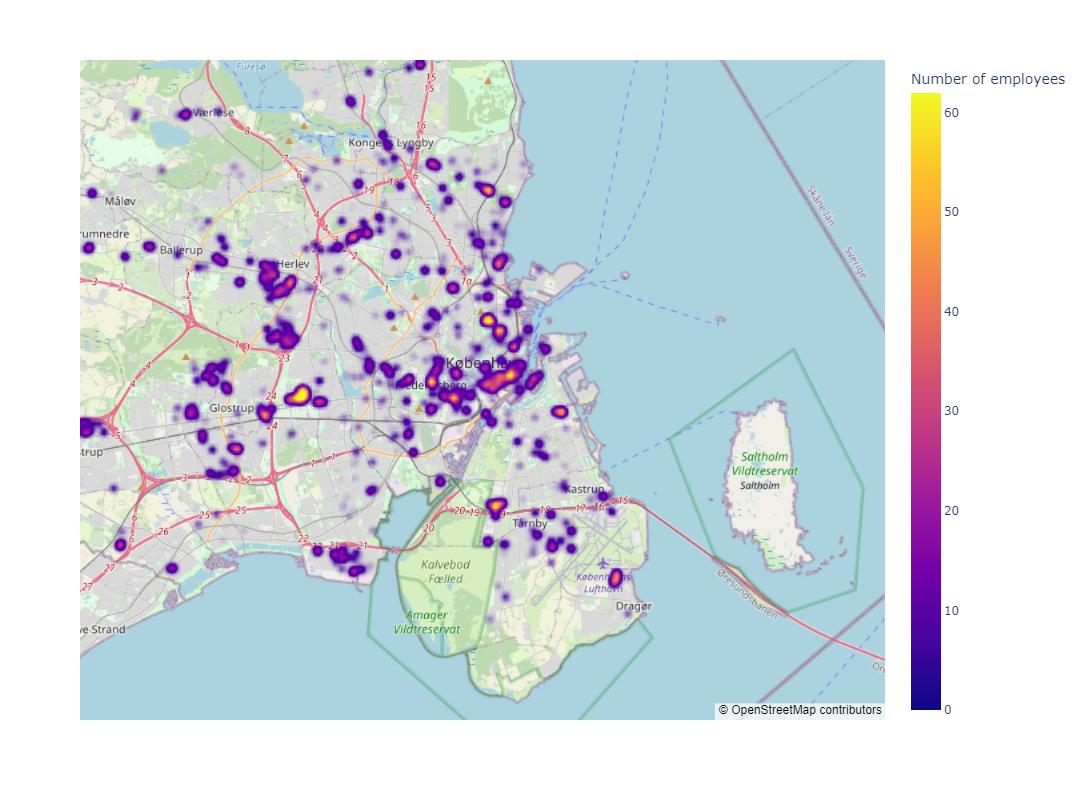

In [45]:
fig = px.density_mapbox(df, 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        z = 'NumEmployees',
                        labels={"NumEmployees": "Number of employees"},
                        radius = 8,
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.show()

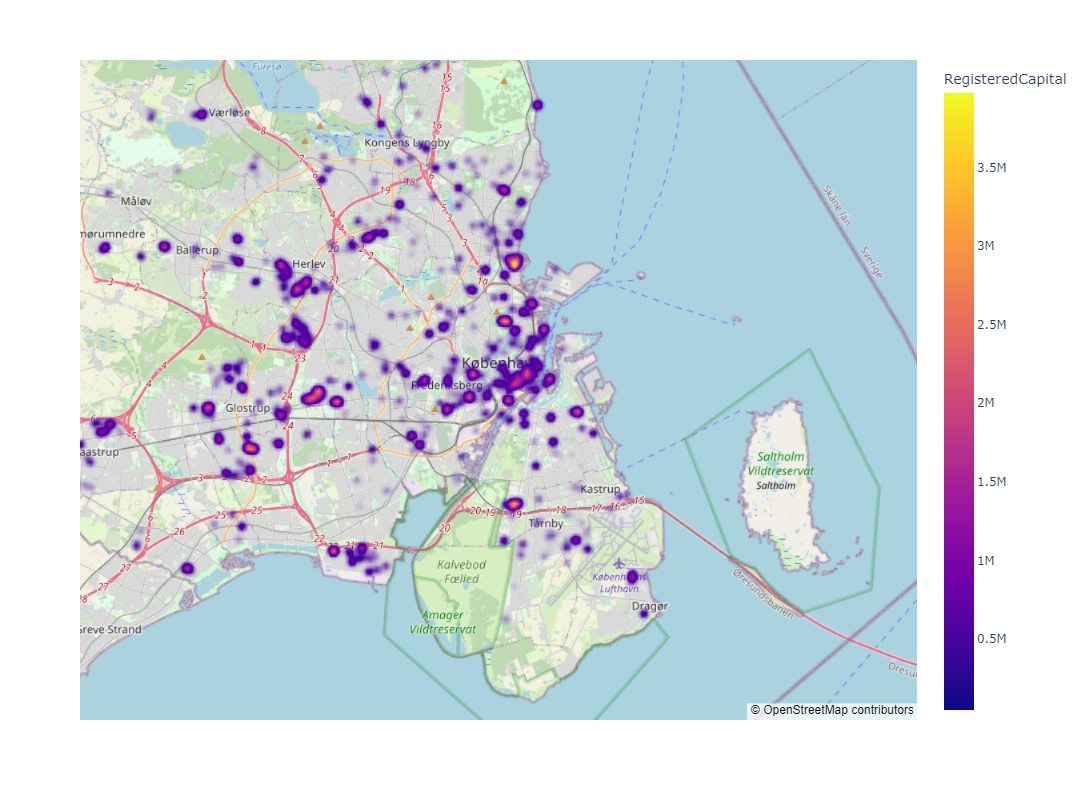

In [46]:
fig = px.density_mapbox(df, 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        z = 'RegisteredCapital',
                        labels={"NumEmployees": "Number of employees"},
                        radius = 8,
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.show()

In [50]:
import datetime

[int((date.today() - datetime.strptime(x, '%Y-%m-%d')).days // days_in_year) for  x in df["StartDate"]]

AttributeError: module 'datetime' has no attribute 'strptime'